In [1]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext
sc = SparkContext.getOrCreate();
sqlContext = SQLContext(sc)

data = sqlContext.read.format('csv').options(header='true', 
                                                 inferschema='true').load('gs://kohls-merch-fuse-dataload/Preprocessed_data/*.csv')

data.take(1)

[Row(is_holiday=0, node=0.0, beginning_of_week=datetime.datetime(2018, 9, 2, 0, 0), year=0, month=9, day=2, quarter=3, smester=2, day_of_year=59, week_of_year=35, day_in_Month=30, total_sal_min=0.0, total_sal_mean=0.0, total_sal_max=0.0, total_sal_sum=0.0, total_revenue=0.11454199257873282, advertised_purchases=0.0, total_sales_new_mean=0.0, revenue_ad_mean=0.0, total_sales_shifted1=0.0, total_sales_shifted2=0.0, total_sales_shifted3=0.0, total_sales_shifted4=0.0, total_sales_shifted5=0.0, total_sales_shifted6=0.0, total_sales_shifted7=0.0, total_revenue_shifted1=0.11454199257873282, total_revenue_shifted2=0.11454199257873282, total_revenue_shifted3=0.11454199257873282, expand_total_sales_3=0.0, expand_total_revenue_3=0.0, total_sales=0)]

In [2]:
data.cache()
data.printSchema()

root
 |-- is_holiday: integer (nullable = true)
 |-- node: double (nullable = true)
 |-- beginning_of_week: timestamp (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- quarter: integer (nullable = true)
 |-- smester: integer (nullable = true)
 |-- day_of_year: integer (nullable = true)
 |-- week_of_year: integer (nullable = true)
 |-- day_in_Month: integer (nullable = true)
 |-- total_sal_min: double (nullable = true)
 |-- total_sal_mean: double (nullable = true)
 |-- total_sal_max: double (nullable = true)
 |-- total_sal_sum: double (nullable = true)
 |-- total_revenue: double (nullable = true)
 |-- advertised_purchases: double (nullable = true)
 |-- total_sales_new_mean: double (nullable = true)
 |-- revenue_ad_mean: double (nullable = true)
 |-- total_sales_shifted1: double (nullable = true)
 |-- total_sales_shifted2: double (nullable = true)
 |-- total_sales_shifted3: double (nullable = true)
 |-- t

In [3]:
data.describe().toPandas().transpose()

0                      1                     2  \
summary                    count                   mean                stddev   
is_holiday              13550664   0.039056093487374495   0.19372846414127928   
node                    13550664    0.11354042643921224   0.07202199753279731   
year                    13550664     1.0638297872340425    0.6653828233223881   
month                   13550664                    6.5    3.6224772454665515   
day                     13550664      15.51063829787234     8.837474549894404   
quarter                 13550664     2.4680851063829787     1.164201236174751   
smester                 13550664     1.4680851063829787    0.4989804183928754   
day_of_year             13550664                   46.5    27.133928103633192   
week_of_year            13550664     26.180851063829788    15.725006256890762   
day_in_Month            13550664      30.43617021276596    0.7657358117834046   
total_sal_min           13550664  0.0019042909233301943  0.007933888504487912   
total_sal_mean          13550664  0.0019042909233301943  0.007933888504487912   
total_sal_max           13550664  0.0019042909233301943  0.007933888504487912   
total_sal_sum           13550664  0.0019042909233301943  0.007933888504487912   
total_revenue           13550664    0.11712116685755956  0.009223733024793576   
advertised_purchases    13550664    0.00514289483863239  0.019068013092944355   
total_sales_new_mean    13550664   0.004964500824630743  0.014315127898973191   
revenue_ad_mean         13550664   0.001904686191979948   0.00790849069618883   
total_sales_shifted1    13550664  0.0019042909233305653   0.00793388850448792   
total_sales_shifted2    13550664  0.0019042909233305658  0.007933888504487925   
total_sales_shifted3    13550664  0.0019042909233305649  0.007933888504487924   
total_sales_shifted4    13550664  0.0019042909233305662  0.007933888504487938   
total_sales_shifted5    13550664  0.0019042909233305662   0.00793388850448792   
total_sales_shifted6    13550664  0.0019042909233305664  0.007933888504487957   
total_sales_shifted7    13550664   0.001904290923330566  0.007933888504487958   
total_revenue_shifted1  13550664    0.11712116685755955  0.009223733024793582   
total_revenue_shifted2  13550664    0.11712116685755955  0.009223733024793521   
total_revenue_shifted3  13550664    0.11712116685755955  0.009223733024793472   
expand_total_sales_3    13550664      5.427214256170431    0.7788257679408441   
expand_total_revenue_3  13550664      32.33417501986709     4.947841501762712   
total_sales             13550664       5.65955262413709     23.57951663533816   

                                           3                   4  
summary                                  min                 max  
is_holiday                                 0                   1  
node                                     0.0  0.9999999999999999  
year                                       0                   2  
month                                      1                  12  
day                                        1                  31  
quarter                                    1                   4  
smester                                    1                   2  
day_of_year                                0                  93  
week_of_year                               1                  52  
day_in_Month                              28                  31  
total_sal_min                            0.0                 1.0  
total_sal_mean                           0.0                 1.0  
total_sal_max                            0.0                 1.0  
total_sal_sum                            0.0                 1.0  
total_revenue                            0.0                 1.0  
advertised_purchases                     0.0                 1.0  
total_sales_new_mean                     0.0                 1.0  
revenue_ad_mean                          0.0                 1.0  
total_sales_shift

In [4]:
columns_to_drop = ['beginning_of_week']
data = data.drop(*columns_to_drop)

# Compare Correlation among columns

In [5]:
import six
for i in data.columns:
    if not( isinstance(data.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to total_sales for ", i, data.stat.corr('total_sales',i))

Correlation to total_sales for  is_holiday -0.008037770941316117
Correlation to total_sales for  node 1.6519584670207135e-05
Correlation to total_sales for  year 0.0010166995112811602
Correlation to total_sales for  month -0.0013409711345900679
Correlation to total_sales for  day -0.0006635303383886262
Correlation to total_sales for  quarter -0.0014177156011552063
Correlation to total_sales for  smester -0.001307303046579386
Correlation to total_sales for  day_of_year -0.0013489502667438005
Correlation to total_sales for  week_of_year -0.0013972115305403258
Correlation to total_sales for  day_in_Month 0.0003136956943462375
Correlation to total_sales for  total_sal_min 0.014231859390271996
Correlation to total_sales for  total_sal_mean 0.014231859390272002
Correlation to total_sales for  total_sal_max 0.014231859390272
Correlation to total_sales for  total_sal_sum 0.014231859390272
Correlation to total_sales for  total_revenue 0.8269640334723696
Correlation to total_sales for  advertise

In [6]:
data.dtypes

[('is_holiday', 'int'),
 ('node', 'double'),
 ('year', 'int'),
 ('month', 'int'),
 ('day', 'int'),
 ('quarter', 'int'),
 ('smester', 'int'),
 ('day_of_year', 'int'),
 ('week_of_year', 'int'),
 ('day_in_Month', 'int'),
 ('total_sal_min', 'double'),
 ('total_sal_mean', 'double'),
 ('total_sal_max', 'double'),
 ('total_sal_sum', 'double'),
 ('total_revenue', 'double'),
 ('advertised_purchases', 'double'),
 ('total_sales_new_mean', 'double'),
 ('revenue_ad_mean', 'double'),
 ('total_sales_shifted1', 'double'),
 ('total_sales_shifted2', 'double'),
 ('total_sales_shifted3', 'double'),
 ('total_sales_shifted4', 'double'),
 ('total_sales_shifted5', 'double'),
 ('total_sales_shifted6', 'double'),
 ('total_sales_shifted7', 'double'),
 ('total_revenue_shifted1', 'double'),
 ('total_revenue_shifted2', 'double'),
 ('total_revenue_shifted3', 'double'),
 ('expand_total_sales_3', 'double'),
 ('expand_total_revenue_3', 'double'),
 ('total_sales', 'int')]

In [7]:
print(data.columns)

['is_holiday', 'node', 'year', 'month', 'day', 'quarter', 'smester', 'day_of_year', 'week_of_year', 'day_in_Month', 'total_sal_min', 'total_sal_mean', 'total_sal_max', 'total_sal_sum', 'total_revenue', 'advertised_purchases', 'total_sales_new_mean', 'revenue_ad_mean', 'total_sales_shifted1', 'total_sales_shifted2', 'total_sales_shifted3', 'total_sales_shifted4', 'total_sales_shifted5', 'total_sales_shifted6', 'total_sales_shifted7', 'total_revenue_shifted1', 'total_revenue_shifted2', 'total_revenue_shifted3', 'expand_total_sales_3', 'expand_total_revenue_3', 'total_sales']


In [8]:
from pyspark.ml.feature import VectorAssembler

vectorAssembler = VectorAssembler(inputCols = ['is_holiday', 'node', 'year', 'month', 'day', 'quarter', 'smester', 'day_of_year', 'week_of_year',
                                               'day_in_Month', 'total_sal_min', 'total_sal_mean', 'total_sal_max', 'total_sal_sum', 'total_revenue', 
                                               'advertised_purchases', 'total_sales_new_mean', 'revenue_ad_mean', 'total_sales_shifted1', 'total_sales_shifted2', 
                                               'total_sales_shifted3', 'total_sales_shifted4', 'total_sales_shifted5', 'total_sales_shifted6', 
                                               'total_sales_shifted7', 'total_revenue_shifted1',
                                               'total_revenue_shifted2', 'total_revenue_shifted3', 'expand_total_sales_3', 'expand_total_revenue_3'], outputCol = 'features')
data_df = vectorAssembler.transform(data)
data_df.take(1)


[Row(is_holiday=0, node=0.0, year=0, month=9, day=2, quarter=3, smester=2, day_of_year=59, week_of_year=35, day_in_Month=30, total_sal_min=0.0, total_sal_mean=0.0, total_sal_max=0.0, total_sal_sum=0.0, total_revenue=0.11454199257873282, advertised_purchases=0.0, total_sales_new_mean=0.0, revenue_ad_mean=0.0, total_sales_shifted1=0.0, total_sales_shifted2=0.0, total_sales_shifted3=0.0, total_sales_shifted4=0.0, total_sales_shifted5=0.0, total_sales_shifted6=0.0, total_sales_shifted7=0.0, total_revenue_shifted1=0.11454199257873282, total_revenue_shifted2=0.11454199257873282, total_revenue_shifted3=0.11454199257873282, expand_total_sales_3=0.0, expand_total_revenue_3=0.0, total_sales=0, features=SparseVector(30, {3: 9.0, 4: 2.0, 5: 3.0, 6: 2.0, 7: 59.0, 8: 35.0, 9: 30.0, 14: 0.1145, 25: 0.1145, 26: 0.1145, 27: 0.1145}))]

In [9]:
data_df = data_df.select(['features', 'total_sales'])
data_df.show(3)

+--------------------+-----------+
|            features|total_sales|
+--------------------+-----------+
|(30,[3,4,5,6,7,8,...|          0|
|(30,[3,4,5,6,7,8,...|          0|
|(30,[3,4,5,6,7,8,...|          0|
+--------------------+-----------+
only showing top 3 rows



In [10]:
splits = data_df.randomSplit([0.75, 0.25])
train_df = splits[0]
test_df = splits[1]

### Linear Regression

In [11]:
from pyspark.ml.regression import LinearRegression

lr_model = LinearRegression(featuresCol = 'features', labelCol='total_sales', maxIter=10, regParam=0.3, elasticNetParam=0.8).fit(train_df)

print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))


Coefficients: [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,199.34391191787378,-43.411793893365605,25.856809736512975,2787.2182479509534,15.995231727131353,15.380127084291857,16.495988351974262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
Intercept: -22.992720553615257


In [12]:
from pyspark.sql.functions import round

In [13]:
pred =lr_model.transform(test_df)
pred.show(5)

+--------------------+-----------+--------------------+
|            features|total_sales|          prediction|
+--------------------+-----------+--------------------+
|(30,[0,1,2,3,4,5,...|          0|-0.15947167410259055|
|(30,[0,1,2,3,4,5,...|          0|-0.15947167410259055|
|(30,[0,1,2,3,4,5,...|          0|-0.15947167410259055|
|(30,[0,1,2,3,4,5,...|          0|-0.15947167410259055|
|(30,[1,2,3,4,5,6,...|          2|  2.5020884998632447|
+--------------------+-----------+--------------------+
only showing top 5 rows



# Round number

In [14]:
import pyspark.sql.functions as func

pred = pred.withColumn("prediction", func.round(pred["prediction"]))
pred.show(5)



+--------------------+-----------+----------+
|            features|total_sales|prediction|
+--------------------+-----------+----------+
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[1,2,3,4,5,6,...|          2|       3.0|
+--------------------+-----------+----------+
only showing top 5 rows



# Convert Negetive to zero

In [23]:
import pyspark.sql.functions as f
from pyspark.sql.types import DoubleType

correctNegativeDiff = f.udf(lambda diff: 0 if diff < 0 else diff )

pred = pred.withColumn('prediction', correctNegativeDiff(pred.prediction).cast(DoubleType()))
pred.show()

+--------------------+-----------+----------+
|            features|total_sales|prediction|
+--------------------+-----------+----------+
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[1,2,3,4,5,6,...|          2|       3.0|
|(30,[1,2,3,4,5,6,...|          1|       3.0|
|(30,[1,2,3,4,5,6,...|          5|       7.0|
|(30,[1,2,3,4,5,6,...|          2|       2.0|
|(30,[1,2,3,4,5,6,...|          2|       3.0|
|(30,[1,2,3,4,5,6,...|          4|       3.0|
|(30,[1,2,3,4,5,6,...|          1|       1.0|
|(30,[1,2,3,4,5,6,...|          2|       2.0|
|(30,[1,2,3,4,5,6,...|          1|       1.0|
|(30,[1,2,3,4,5,6,...|          1|       1.0|
|(30,[1,2,3,4,5,6,...|          1|       2.0|
|(30,[1,2,3,4,5,6,...|         12|       9.0|
|(30,[1,2,3,4,5,6,...|          2|       2.0|
|(30,[1,2,3,4,5,6,...|          3|       7.0|
|(30,[1,2,3,4,5,6,...|         10|

In [24]:
pred.dtypes

[('features', 'vector'), ('total_sales', 'int'), ('prediction', 'double')]

In [25]:
from pyspark.ml.evaluation import RegressionEvaluator 
lr_evaluator = RegressionEvaluator(predictionCol='prediction', labelCol='total_sales')

R_squared_lr= lr_evaluator.setMetricName('r2').evaluate(pred)
MSE_lr= lr_evaluator.setMetricName('mse').evaluate(pred)
RMSE_lr= lr_evaluator.setMetricName('rmse').evaluate(pred)
MAE_lr=lr_evaluator.setMetricName('mae').evaluate(pred)



print ("R-squared= ", R_squared_lr)
print ("MSE= ", MSE_lr)
print ("RMSE= ", RMSE_lr)
print ("MAE= ", MAE_lr) 

R-squared=  0.9924562158218411
MSE=  4.182792029117294
RMSE=  2.0451875290831634
MAE=  0.5966323091421405


In [26]:
import pyspark.sql.functions as func

pred = pred.withColumn("prediction", func.round(pred["prediction"]))
pred.show(5)


correctNegativeDiff = func.udf(lambda diff: 0 if diff < 0 else diff)

pred = pred.withColumn('prediction', correctNegativeDiff(pred.prediction))
pred.show()

+--------------------+-----------+----------+
|            features|total_sales|prediction|
+--------------------+-----------+----------+
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[1,2,3,4,5,6,...|          2|       3.0|
+--------------------+-----------+----------+
only showing top 5 rows

+--------------------+-----------+----------+
|            features|total_sales|prediction|
+--------------------+-----------+----------+
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[1,2,3,4,5,6,...|          2|       3.0|
|(30,[1,2,3,4,5,6,...|          1|       3.0|
|(30,[1,2,3,4,5,6,...|          5|       7.0|
|(30,[1,2,3,4,5,6,...|          2|       2.0|
|(30,[1,2,3,4,5,6,...|          2|       3.0|
|(30,[1,2

RMSE measures the differences between predicted values by the model and the actual values. However, RMSE alone is meaningless until we compare with the actual "total_sales" value, such as mean, min and max. After such comparison, our RMSE looks pretty good.

In [27]:
train_df.describe().show()

+-------+------------------+
|summary|       total_sales|
+-------+------------------+
|  count|          10163536|
|   mean|  5.66059312428273|
| stddev|23.590290423462225|
|    min|                 0|
|    max|              2972|
+-------+------------------+



R squared at 0.99 indicates that in our model, approximate 99% of the variability in "total_sales" can be explained using the model. This is not bad.

In [28]:
# lr_predictions = lr_model.transform(test_df)
# lr_predictions.select("prediction","total_sales","features").show(5)

# from pyspark.ml.evaluation import RegressionEvaluator
# lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
#                  labelCol="total_sales",metricName="r2")
# print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

# test_result = lr_model.evaluate(test_df)
# print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)
# print("numIterations: %d" % trainingSummary.totalIterations)
# print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
# trainingSummary.residuals.show()
# predictions = lr_model.transform(test_df)
# predictions.select("prediction","total_sales","features").show()

### Decision tree regression

In [29]:
from pyspark.ml.regression import DecisionTreeRegressor

dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'total_sales')
dt_model = dt.fit(train_df)


dt_predictions = dt_model.transform(test_df) # prediction

dt_predictions.show(5)

+--------------------+-----------+--------------------+
|            features|total_sales|          prediction|
+--------------------+-----------+--------------------+
|(30,[0,1,2,3,4,5,...|          0|9.047239573773884E-5|
|(30,[0,1,2,3,4,5,...|          0|9.047239573773884E-5|
|(30,[0,1,2,3,4,5,...|          0|9.047239573773884E-5|
|(30,[0,1,2,3,4,5,...|          0|9.047239573773884E-5|
|(30,[1,2,3,4,5,6,...|          2|   2.263979672835966|
+--------------------+-----------+--------------------+
only showing top 5 rows



In [30]:
import pyspark.sql.functions as func
from pyspark.sql.types import DoubleType

dt_predictions = dt_predictions.withColumn("prediction", func.round(dt_predictions["prediction"]))
dt_predictions.show(5)

correctNegativeDiff = func.udf(lambda diff: 0 if diff < 0 else diff )

dt_predictions = dt_predictions.withColumn('prediction', correctNegativeDiff(dt_predictions.prediction).cast(DoubleType()))
dt_predictions.show()

+--------------------+-----------+----------+
|            features|total_sales|prediction|
+--------------------+-----------+----------+
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[1,2,3,4,5,6,...|          2|       2.0|
+--------------------+-----------+----------+
only showing top 5 rows

+--------------------+-----------+----------+
|            features|total_sales|prediction|
+--------------------+-----------+----------+
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[1,2,3,4,5,6,...|          2|       2.0|
|(30,[1,2,3,4,5,6,...|          1|       2.0|
|(30,[1,2,3,4,5,6,...|          5|       6.0|
|(30,[1,2,3,4,5,6,...|          2|       2.0|
|(30,[1,2,3,4,5,6,...|          2|       4.0|
|(30,[1,2

In [31]:
from pyspark.ml.evaluation import RegressionEvaluator 
dt_evaluator = RegressionEvaluator(predictionCol='prediction', labelCol='total_sales')

R_squared_dt= dt_evaluator.setMetricName('r2').evaluate(dt_predictions)
MSE_dt= dt_evaluator.setMetricName('mse').evaluate(dt_predictions)
RMSE_dt= dt_evaluator.setMetricName('rmse').evaluate(dt_predictions)
MAE_dt=dt_evaluator.setMetricName('mae').evaluate(dt_predictions)



print ("R-squared= ", R_squared_dt)
print ("MSE= ", MSE_dt)
print ("RMSE= ", RMSE_dt)
print ("MAE= ", MAE_dt) 

R-squared=  0.6856676239858457
MSE=  174.28745651182953
RMSE=  13.201797472762166
MAE=  1.5498676164585454


### Feature Importance

In [32]:
train_df.take(1)

[Row(features=SparseVector(30, {0: 1.0, 1: 0.009, 2: 1.0, 3: 12.0, 4: 1.0, 5: 4.0, 6: 2.0, 7: 84.0, 8: 48.0, 9: 31.0, 14: 0.1145, 16: 0.0012, 25: 0.1145, 26: 0.1145, 27: 0.1145, 28: 0.3675, 29: 1.938}), total_sales=0)]

In [33]:
dt_model.featureImportances

SparseVector(30, {14: 0.044, 15: 0.0161, 16: 0.0931, 17: 0.829, 28: 0.0172, 29: 0.0005})

In [34]:
data.take(1)

[Row(is_holiday=0, node=0.0, year=0, month=9, day=2, quarter=3, smester=2, day_of_year=59, week_of_year=35, day_in_Month=30, total_sal_min=0.0, total_sal_mean=0.0, total_sal_max=0.0, total_sal_sum=0.0, total_revenue=0.11454199257873282, advertised_purchases=0.0, total_sales_new_mean=0.0, revenue_ad_mean=0.0, total_sales_shifted1=0.0, total_sales_shifted2=0.0, total_sales_shifted3=0.0, total_sales_shifted4=0.0, total_sales_shifted5=0.0, total_sales_shifted6=0.0, total_sales_shifted7=0.0, total_revenue_shifted1=0.11454199257873282, total_revenue_shifted2=0.11454199257873282, total_revenue_shifted3=0.11454199257873282, expand_total_sales_3=0.0, expand_total_revenue_3=0.0, total_sales=0)]

The number of rooms is the most important feature to predict the house price.

### Gradient-boosted tree regression

In [35]:
from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(featuresCol = 'features', labelCol = 'total_sales', maxIter=10)
gbt_model = gbt.fit(train_df)
gbt_predictions = gbt_model.transform(test_df)
gbt_predictions.select('prediction', 'total_sales', 'features').show(5)

+--------------------+-----------+--------------------+
|          prediction|total_sales|            features|
+--------------------+-----------+--------------------+
|0.023695235426356216|          0|(30,[0,1,2,3,4,5,...|
|0.023695235426356216|          0|(30,[0,1,2,3,4,5,...|
|0.023695235426356216|          0|(30,[0,1,2,3,4,5,...|
|0.023695235426356216|          0|(30,[0,1,2,3,4,5,...|
|  2.0670787948695803|          2|(30,[1,2,3,4,5,6,...|
+--------------------+-----------+--------------------+
only showing top 5 rows



In [36]:
import pyspark.sql.functions as func
from pyspark.sql.types import DoubleType

gbt_predictions = gbt_predictions.withColumn("prediction", func.round(gbt_predictions["prediction"]))
gbt_predictions.show(5)

correctNegativeDiff = func.udf(lambda diff: 0 if diff < 0 else diff )

gbt_predictions = gbt_predictions.withColumn('prediction', correctNegativeDiff(gbt_predictions.prediction).cast(DoubleType()))

gbt_predictions.show()


+--------------------+-----------+----------+
|            features|total_sales|prediction|
+--------------------+-----------+----------+
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[1,2,3,4,5,6,...|          2|       2.0|
+--------------------+-----------+----------+
only showing top 5 rows

+--------------------+-----------+----------+
|            features|total_sales|prediction|
+--------------------+-----------+----------+
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[1,2,3,4,5,6,...|          2|       2.0|
|(30,[1,2,3,4,5,6,...|          1|       3.0|
|(30,[1,2,3,4,5,6,...|          5|       6.0|
|(30,[1,2,3,4,5,6,...|          2|       2.0|
|(30,[1,2,3,4,5,6,...|          2|       3.0|
|(30,[1,2

In [37]:
from pyspark.ml.evaluation import RegressionEvaluator 
gbt_evaluator = RegressionEvaluator(predictionCol='prediction', labelCol='total_sales')

R_squared_gbt= gbt_evaluator.setMetricName('r2').evaluate(gbt_predictions)
MSE_gbt= gbt_evaluator.setMetricName('mse').evaluate(gbt_predictions)
RMSE_gbt= gbt_evaluator.setMetricName('rmse').evaluate(gbt_predictions)
MAE_gbt=gbt_evaluator.setMetricName('mae').evaluate(gbt_predictions)



print ("R-squared= ", R_squared_gbt)
print ("MSE= ", MSE_gbt)
print ("RMSE= ", RMSE_gbt)
print ("MAE= ", MAE_gbt) 

R-squared=  0.7860945004507327
MSE=  118.6038992326242
RMSE=  10.890541732743335
MAE=  1.354307247910324


# Generalized Linear Regression

In [38]:
# Import LinearRegression class
from pyspark.ml.regression import GeneralizedLinearRegression

# Define LinearRegression algorithm
glr = GeneralizedLinearRegression(family="gaussian", link="identity",\
                                  maxIter=10, regParam=0.3)

glr_model = gbt.fit(train_df)
glr_predictions = gbt_model.transform(test_df)
glr_predictions.select('prediction', 'total_sales', 'features').show(5)

+--------------------+-----------+--------------------+
|          prediction|total_sales|            features|
+--------------------+-----------+--------------------+
|0.023695235426356216|          0|(30,[0,1,2,3,4,5,...|
|0.023695235426356216|          0|(30,[0,1,2,3,4,5,...|
|0.023695235426356216|          0|(30,[0,1,2,3,4,5,...|
|0.023695235426356216|          0|(30,[0,1,2,3,4,5,...|
|  2.0670787948695803|          2|(30,[1,2,3,4,5,6,...|
+--------------------+-----------+--------------------+
only showing top 5 rows



In [39]:
import pyspark.sql.functions as func
from pyspark.sql.types import DoubleType

glr_predictions = glr_predictions.withColumn("prediction", func.round(glr_predictions["prediction"]))
glr_predictions.show(5)

correctNegativeDiff = func.udf(lambda diff: 0 if diff < 0 else diff )

glr_predictions = glr_predictions.withColumn('prediction', correctNegativeDiff(glr_predictions.prediction).cast(DoubleType()))

glr_predictions.show()

+--------------------+-----------+----------+
|            features|total_sales|prediction|
+--------------------+-----------+----------+
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[1,2,3,4,5,6,...|          2|       2.0|
+--------------------+-----------+----------+
only showing top 5 rows

+--------------------+-----------+----------+
|            features|total_sales|prediction|
+--------------------+-----------+----------+
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[1,2,3,4,5,6,...|          2|       2.0|
|(30,[1,2,3,4,5,6,...|          1|       3.0|
|(30,[1,2,3,4,5,6,...|          5|       6.0|
|(30,[1,2,3,4,5,6,...|          2|       2.0|
|(30,[1,2,3,4,5,6,...|          2|       3.0|
|(30,[1,2

In [40]:
from pyspark.ml.evaluation import RegressionEvaluator 
glr_evaluator = RegressionEvaluator(predictionCol='prediction', labelCol='total_sales')

R_squared_glr= glr_evaluator.setMetricName('r2').evaluate(glr_predictions)
MSE_glr= glr_evaluator.setMetricName('mse').evaluate(glr_predictions)
RMSE_glr= glr_evaluator.setMetricName('rmse').evaluate(glr_predictions)
MAE_glr=glr_evaluator.setMetricName('mae').evaluate(glr_predictions)



print ("R-squared= ", R_squared_glr)
print ("MSE= ", MSE_glr)
print ("RMSE= ", RMSE_glr)
print ("MAE= ", MAE_glr) 

R-squared=  0.7860945004507327
MSE=  118.6038992326242
RMSE=  10.890541732743335
MAE=  1.354307247910324


# RandomForestRegressor


In [41]:
# Import AFTSurvivalRegression class
from pyspark.ml.regression import RandomForestRegressor


# Define LinearRegression algorithm
rf_model = RandomForestRegressor(featuresCol = 'features', labelCol = 'total_sales').fit(train_df)

rf_predictions = rf_model.transform(test_df)
rf_predictions.select('prediction', 'total_sales', 'features').show(5)

+--------------------+-----------+--------------------+
|          prediction|total_sales|            features|
+--------------------+-----------+--------------------+
|0.013655768401045066|          0|(30,[0,1,2,3,4,5,...|
|0.013655768401045066|          0|(30,[0,1,2,3,4,5,...|
|0.013655768401045066|          0|(30,[0,1,2,3,4,5,...|
|0.013655768401045066|          0|(30,[0,1,2,3,4,5,...|
|   2.078737155499974|          2|(30,[1,2,3,4,5,6,...|
+--------------------+-----------+--------------------+
only showing top 5 rows



In [42]:
import pyspark.sql.functions as func
from pyspark.sql.types import DoubleType

rf_predictions = rf_predictions.withColumn("prediction", func.round(rf_predictions["prediction"]))
rf_predictions.show(5)

correctNegativeDiff = func.udf(lambda diff: 0 if diff < 0 else diff )

rf_predictions = rf_predictions.withColumn('prediction', correctNegativeDiff(rf_predictions.prediction).cast(DoubleType()))

rf_predictions.show()



+--------------------+-----------+----------+
|            features|total_sales|prediction|
+--------------------+-----------+----------+
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[1,2,3,4,5,6,...|          2|       2.0|
+--------------------+-----------+----------+
only showing top 5 rows

+--------------------+-----------+----------+
|            features|total_sales|prediction|
+--------------------+-----------+----------+
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[0,1,2,3,4,5,...|          0|       0.0|
|(30,[1,2,3,4,5,6,...|          2|       2.0|
|(30,[1,2,3,4,5,6,...|          1|       2.0|
|(30,[1,2,3,4,5,6,...|          5|       6.0|
|(30,[1,2,3,4,5,6,...|          2|       2.0|
|(30,[1,2,3,4,5,6,...|          2|       3.0|
|(30,[1,2

In [43]:
from pyspark.ml.evaluation import RegressionEvaluator 
rf_evaluator = RegressionEvaluator(predictionCol='prediction', labelCol='total_sales')

R_squared_rf= rf_evaluator.setMetricName('r2').evaluate(glr_predictions)
MSE_rf= rf_evaluator.setMetricName('mse').evaluate(glr_predictions)
RMSE_rf= rf_evaluator.setMetricName('rmse').evaluate(glr_predictions)
MAE_rf=rf_evaluator.setMetricName('mae').evaluate(glr_predictions)



print ("R-squared= ", R_squared_rf)
print ("MSE= ", MSE_rf)
print ("RMSE= ", RMSE_rf)
print ("MAE= ", MAE_rf) 

R-squared=  0.7860945004507327
MSE=  118.6038992326242
RMSE=  10.890541732743335
MAE=  1.354307247910324


#  IsotonicRegression 


In [44]:
from pyspark.ml.regression import IsotonicRegression


# Define LinearRegression algorithm
iso_model = IsotonicRegression(featuresCol = 'features', labelCol = 'total_sales').fit(train_df)

iso_predictions = iso_model.transform(test_df)
iso_predictions.select('prediction', 'total_sales', 'features').show(5)

+----------+-----------+--------------------+
|prediction|total_sales|            features|
+----------+-----------+--------------------+
|     172.0|          0|(30,[0,1,2,3,4,5,...|
|     172.0|          0|(30,[0,1,2,3,4,5,...|
|     172.0|          0|(30,[0,1,2,3,4,5,...|
|     172.0|          0|(30,[0,1,2,3,4,5,...|
|      42.0|          2|(30,[1,2,3,4,5,6,...|
+----------+-----------+--------------------+
only showing top 5 rows



In [45]:
import pyspark.sql.functions as func
from pyspark.sql.types import DoubleType

iso_predictions = iso_predictions.withColumn("prediction", func.round(iso_predictions["prediction"]))
iso_predictions.show(5)

correctNegativeDiff = func.udf(lambda diff: 0 if diff < 0 else diff )

iso_predictions = iso_predictions.withColumn('prediction', correctNegativeDiff(iso_predictions.prediction).cast(DoubleType()))

iso_predictions.show()



+--------------------+-----------+----------+
|            features|total_sales|prediction|
+--------------------+-----------+----------+
|(30,[0,1,2,3,4,5,...|          0|     172.0|
|(30,[0,1,2,3,4,5,...|          0|     172.0|
|(30,[0,1,2,3,4,5,...|          0|     172.0|
|(30,[0,1,2,3,4,5,...|          0|     172.0|
|(30,[1,2,3,4,5,6,...|          2|      42.0|
+--------------------+-----------+----------+
only showing top 5 rows

+--------------------+-----------+----------+
|            features|total_sales|prediction|
+--------------------+-----------+----------+
|(30,[0,1,2,3,4,5,...|          0|     172.0|
|(30,[0,1,2,3,4,5,...|          0|     172.0|
|(30,[0,1,2,3,4,5,...|          0|     172.0|
|(30,[0,1,2,3,4,5,...|          0|     172.0|
|(30,[1,2,3,4,5,6,...|          2|      42.0|
|(30,[1,2,3,4,5,6,...|          1|      42.0|
|(30,[1,2,3,4,5,6,...|          5|      42.0|
|(30,[1,2,3,4,5,6,...|          2|      42.0|
|(30,[1,2,3,4,5,6,...|          2|      42.0|
|(30,[1,2

In [46]:
from pyspark.ml.evaluation import RegressionEvaluator 
iso_evaluator = RegressionEvaluator(predictionCol='prediction', labelCol='total_sales')

R_squared_iso= iso_evaluator.setMetricName('r2').evaluate(iso_predictions)
MSE_iso= iso_evaluator.setMetricName('mse').evaluate(iso_predictions)
RMSE_iso= iso_evaluator.setMetricName('rmse').evaluate(iso_predictions)
MAE_iso=iso_evaluator.setMetricName('mae').evaluate(iso_predictions)



print ("R-squared= ", R_squared_iso)
print ("MSE= ", MSE_iso)
print ("RMSE= ", RMSE_iso)
print ("MAE= ", MAE_iso) 

R-squared=  -4.255632312581103
MSE=  2914.0834925636113
RMSE=  53.982251644069194
MAE=  44.76838666858767


In [47]:
# importing pandas as pd 
import pandas as pd 

# dictionary of lists 
dict = {'R-squared':[R_squared_rf , R_squared_glr , R_squared_gbt , R_squared_dt , R_squared_lr ,R_squared_iso], 
		'MSE': [MSE_rf, MSE_glr , MSE_gbt ,MSE_dt , MSE_lr ,MSE_iso], 
        'RMSE':[RMSE_rf , RMSE_glr , RMSE_gbt , RMSE_dt ,RMSE_lr,RMSE_iso  ],
		'MAE':[RMSE_rf, MAE_glr , MAE_gbt ,MAE_dt , MAE_lr,MAE_iso ]} 
idx = ["Random Forest" , "Generalized Linear Regression" , 'Gradient-boosted tree regression' ,
      'Decision tree regression' , 'Linear regression' , 'Isotonic Regression' ]

df = pd.DataFrame(dict , index = idx) 

print(df) 


                                  R-squared          MSE       RMSE        MAE
Random Forest                      0.786095   118.603899  10.890542  10.890542
Generalized Linear Regression      0.786095   118.603899  10.890542   1.354307
Gradient-boosted tree regression   0.786095   118.603899  10.890542   1.354307
Decision tree regression           0.685668   174.287457  13.201797   1.549868
Linear regression                  0.992456     4.182792   2.045188   0.596632
Isotonic Regression               -4.255632  2914.083493  53.982252  44.768387


# R_squared

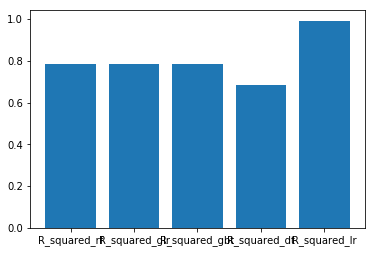

In [48]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
fig, ax = plt.subplots()
ax.set_xticks(np.arange(5))
ax.set_xticklabels(["R_squared_rf" , "R_squared_glr" , "R_squared_gbt" , "R_squared_dt" , "R_squared_lr" ])
plt.bar(range(5),[R_squared_rf , R_squared_glr , R_squared_gbt , R_squared_dt , R_squared_lr ])
plt.show()